In [15]:
try:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    print('v1 behaviour!')
except ImportError:
    import tensorflow as tf
    print('Entered in the exception')

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from numpy import where
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

tf.config.run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


v1 behaviour!


In [16]:
seed = 42

In [17]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Method to plot the Perceptron's decision boundary.
def plot_decision_boundary(classifier, X, y, title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    XX_ = np.c_[xx.ravel(), yy.ravel()]

    Z = classifier.predict(XX_)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.grid()

    plt.show()

In [18]:
N = 1000

# generate 2d classification dataset
X, y = make_blobs(n_samples=N, centers=2, n_features=2, random_state=seed)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

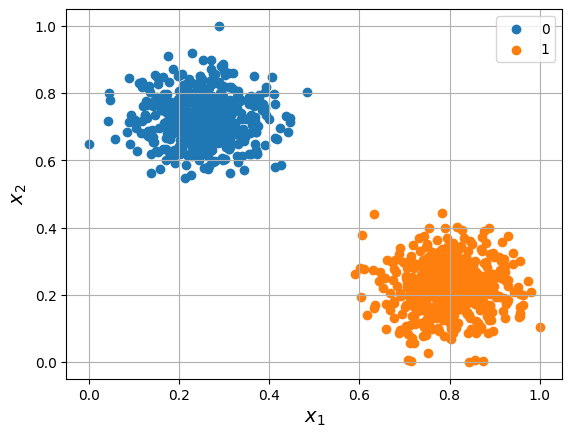

In [19]:
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.xlabel('$x_1$', fontsize=14)
pyplot.ylabel('$x_2$', fontsize=14)
pyplot.grid()
pyplot.show()

### Função de ativação sigmóide

**OBS**.:

+ O parâmetro `histogram_freq` da callback `TensorBoard` diz ao tensorflow para calcular as distribuições (i.e., histograma) após cada época. Se estiver definido como 0, ela não plotará nenhuma distribuição.

+ Significado dos eixos:
    + O eixo x corresponde aos valores dos pesos. Basicamente o intervalo de valores dos pesos ou gradientes desta camada.
    + O eixo y corresponde à distribuição. Intuitivamente, esses valores mostram o número de ocorrências normalizadas do valor de peso ou gradiente correspondente na camada.
    + O eixo de z são os passos (ou épocas). Podemos observar as mudanças na distribuição dos pesos ou gradientes ao longo dessas etapas.

In [21]:
reset_graph()

# define model
tf.keras.backend.clear_session()

init = tf.keras.initializers.RandomUniform(minval=0, maxval=1)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Substituindo o uso de input_dim por Input layer
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseIn'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden1'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden2'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden3'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden4'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden5'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden6'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden7'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden8'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden9'),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden10'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init, name='denseOut')
])


# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# prepare callback
tb = tf.keras.callbacks.TensorBoard(log_dir='./logs_sigmoid', histogram_freq=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, callbacks=[tb])


Epoch 1/500


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [ ]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.xlabel('Iteration', fontsize=14)
pyplot.ylabel('Accuracy', fontsize=14)
pyplot.legend()
pyplot.grid()
pyplot.show()

In [ ]:
plot_decision_boundary(model, X, y, '2 Classes')

#### IMPORTANTE: As vezes é necessário se executar estas duas linhas.

taskkill /im tensorboard.exe /f

del /q %TMP%\.tensorboard-info\*

C:\Users\felipe.figueiredo\AppData\Local\Temp

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
#%reload_ext tensorboard

In [ ]:
%tensorboard --logdir './logs_sigmoid'

### Função de ativação ReLU

In [ ]:
reset_graph()

# define model
init = tf.compat.v1.keras.initializers.RandomUniform(minval=0, maxval=1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu', kernel_initializer=init, name='denseIn'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden1'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden2'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden3'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden4'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden5'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden6'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden7'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden8'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden9'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden10'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init, name='denseOut'))

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# prepare callback
tb = tf.keras.callbacks.TensorBoard(histogram_freq=1, write_grads=True, log_dir='./logs_relu')

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, callbacks=[tb])

In [ ]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.xlabel('Iteration', fontsize=14)
pyplot.ylabel('Accuracy', fontsize=14)
pyplot.legend()
pyplot.grid()
pyplot.show()

In [ ]:
plot_decision_boundary(model, X, y, '2 Classes')

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir './logs_relu' --port=8008

### Referências

[1] https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/

[2] https://medium.com/analytics-vidhya/debugging-dnn-with-help-of-tensorboard-f737b7bc5ed9

[3] https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b#.bojpejg3o